In [4]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import os
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf    

In [2]:
class_names = ['0','1','2','3']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)
IMAGE_SIZE = (128, 128)

In [5]:

## Function definition
def load_data():
    
    datasets = ['/home/sky/Desktop/driver_drowsiness/dataset/train', '/home/sky/Desktop/driver_drowsiness/dataset/test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            curr_label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in os.listdir(os.path.join(dataset, folder)):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(curr_img)
                labels.append(curr_label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

## Function Call
(train_images, train_labels), (test_images, test_labels) = load_data()


Loading /home/sky/Desktop/driver_drowsiness/dataset/train
Loading /home/sky/Desktop/driver_drowsiness/dataset/test


In [6]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

train_images, train_labels = shuffle(train_images, train_labels)

In [7]:
train_images.shape

(2467, 150, 150, 3)

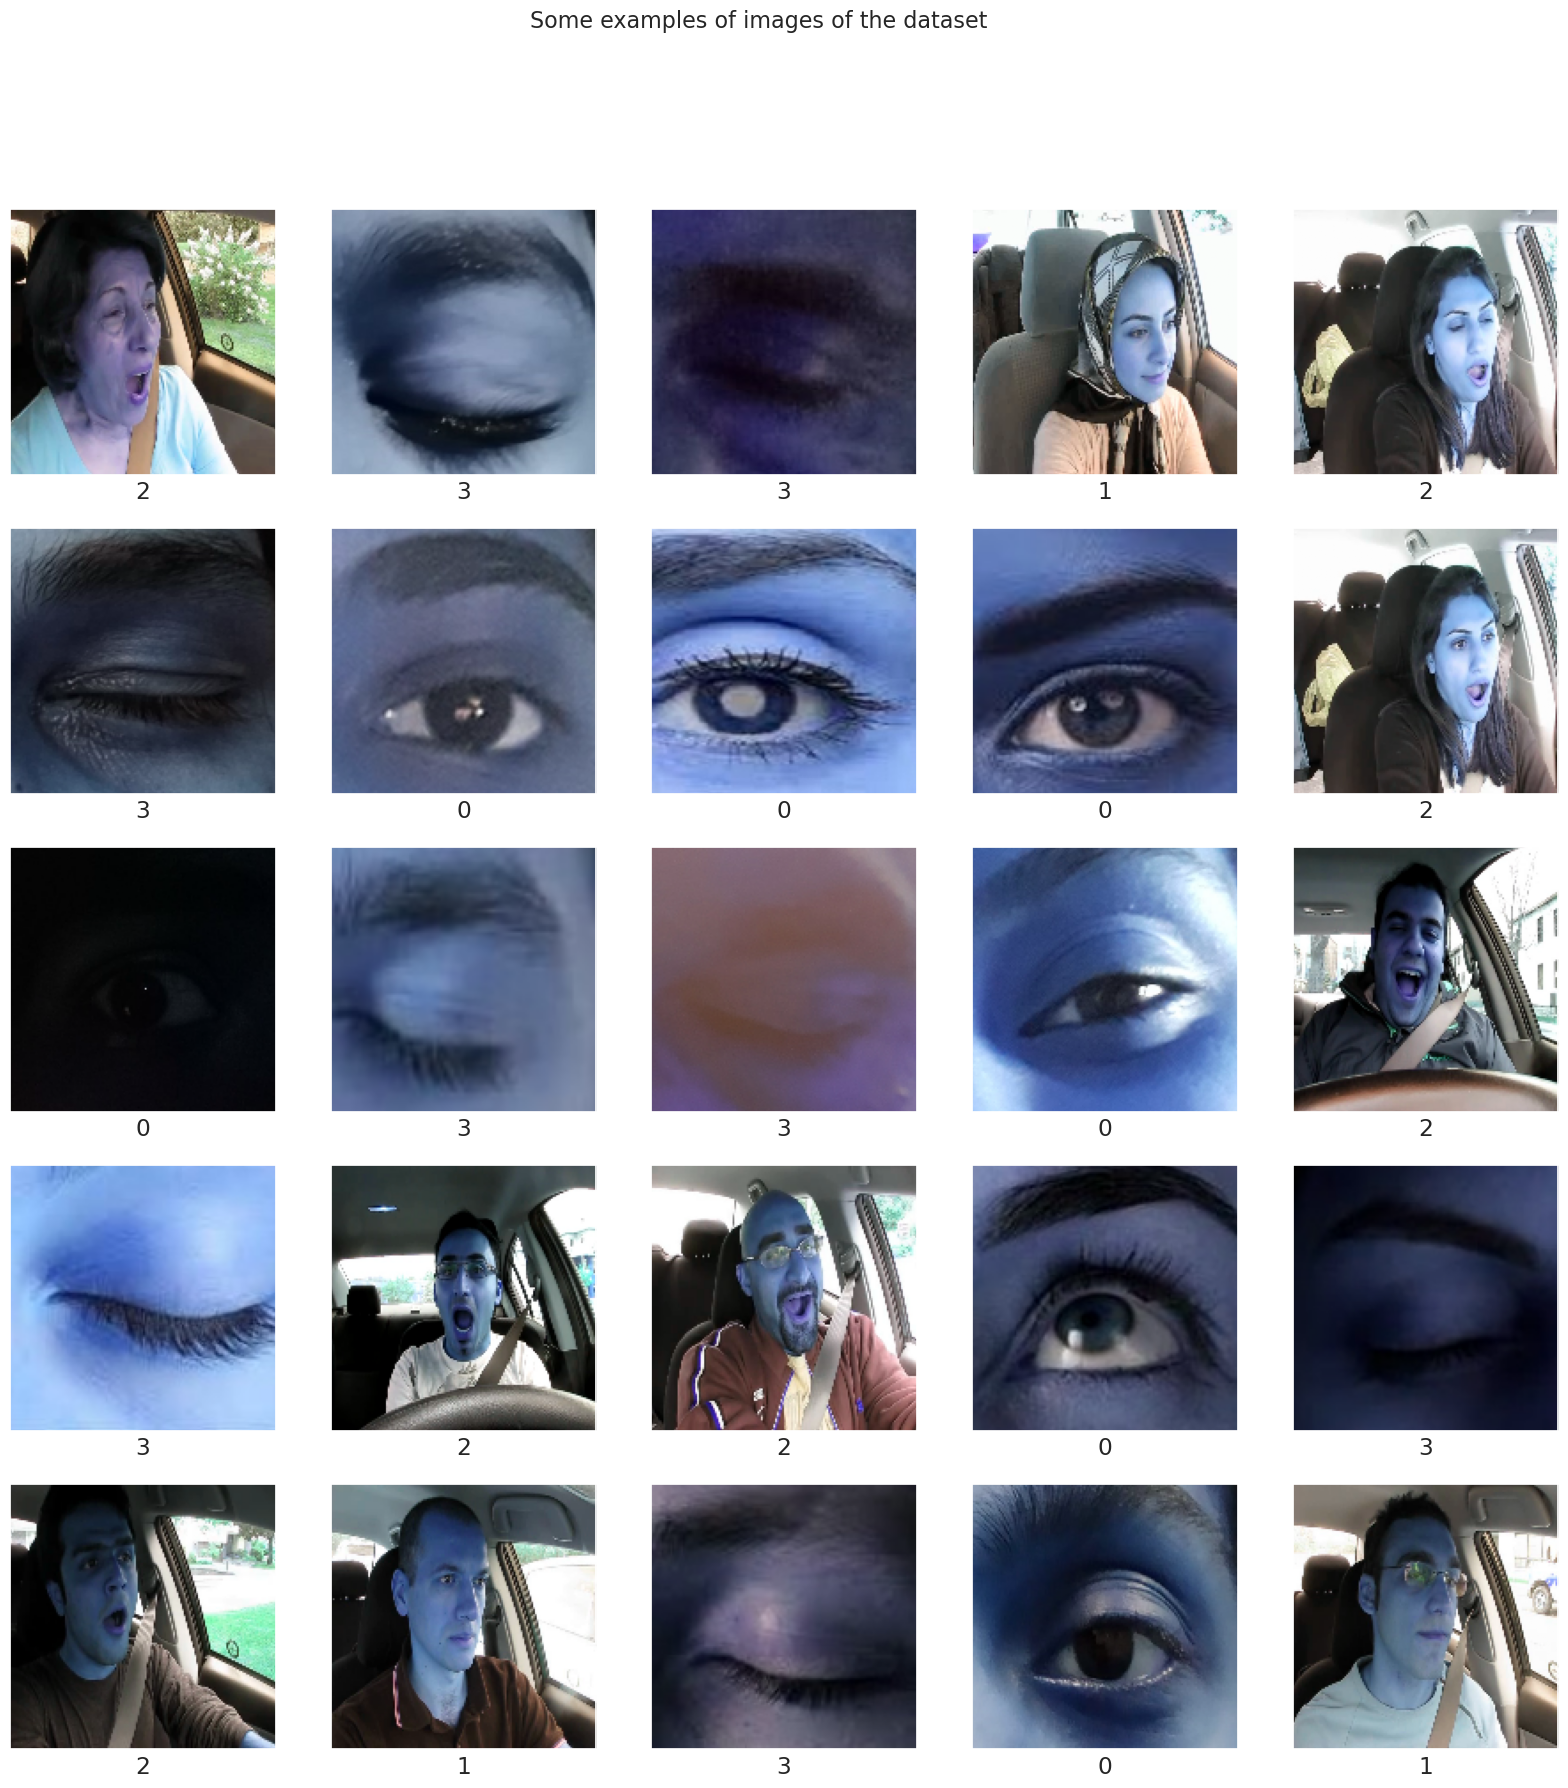

In [8]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.show()

    ## Function call
display_examples(class_names, train_images, train_labels)


In [9]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(train_labels, 4)
y_test = np_utils.to_categorical(test_labels, 4)

In [10]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_classes = 4

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
my_new_model.add(Dense(num_classes, activation='softmax'))

my_new_model.layers[0].trainable = False

my_new_model.summary()

94765736/94765736 [==============================] - 61s 1us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 23,595,908
Trainable params: 8,196
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
from keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [15]:
# fits the model on batches with real-time data augmentation:
history = my_new_model.fit_generator(train_gen.flow(train_images, y_train, batch_size=32),
                              steps_per_epoch=len(train_images) / 64, epochs=10,
                              validation_data = (test_images, y_test))

/tmp/ipykernel_5379/1527092813.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = my_new_model.fit_generator(train_gen.flow(train_images, y_train, batch_size=32),
2023-06-09 00:04:40.454597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Epoch 1/10
39/38 [==============================] - ETA: 0s - loss: 1.3821 - accuracy: 0.3598

2023-06-09 00:05:18.294254: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 116910000 exceeds 10% of free system memory.


38/38 [==============================] - 51s 1s/step - loss: 1.3821 - accuracy: 0.3598 - val_loss: 1.2526 - val_accuracy: 0.3187
Epoch 2/10
38/38 [==============================] - 55s 1s/step - loss: 1.2510 - accuracy: 0.4119 - val_loss: 1.2325 - val_accuracy: 0.2517
Epoch 3/10
38/38 [==============================] - 61s 2s/step - loss: 1.1799 - accuracy: 0.4627 - val_loss: 1.2083 - val_accuracy: 0.2517
Epoch 4/10
38/38 [==============================] - 62s 2s/step - loss: 1.1319 - accuracy: 0.4583 - val_loss: 1.0493 - val_accuracy: 0.5012
Epoch 5/10
38/38 [==============================] - 62s 2s/step - loss: 1.1078 - accuracy: 0.4635 - val_loss: 0.9557 - val_accuracy: 0.4850
Epoch 6/10
38/38 [==============================] - 65s 2s/step - loss: 1.0552 - accuracy: 0.4720 - val_loss: 0.9650 - val_accuracy: 0.4942
Epoch 7/10
38/38 [==============================] - 65s 2s/step - loss: 1.0151 - accuracy: 0.5012 - val_loss: 0.9905 - val_accuracy: 0.4942
Epoch 8/10
38/38 [=============

In [28]:
# epich = np.cumsum(np.concatenate(
#     [np.linspace(0.5, 1, len(mh.epoch)) for mh in loss_history]))
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
# _ = ax1.plot(epich,
#              np.concatenate([mh.history['loss'] for mh in loss_history]),
#              'b-',
#              epich, np.concatenate(
#         [mh.history['val_loss'] for mh in loss_history]), 'r-')
# ax1.legend(['Training', 'Validation'])
# ax1.set_title('Loss')

# _ = ax2.plot(epich, np.concatenate(
#     [mh.history['accuracy'] for mh in loss_history]), 'b-',
#                  epich, np.concatenate(
#         [mh.history['val_accuracy'] for mh in loss_history]),
#                  'r-')
# ax2.legend(['Training', 'Validation'])
# ax2.set_title('Accuracy')

In [ ]:
#my_new_model.save("/res_model10.h5")